In [256]:
import numpy as np
import matplotlib.pyplot as plt
from backwardc import floodsz_backwardc as flood
from backwardc import angle2norm, norm2angle, normalization1
from scipy import interpolate
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
rc('font', size=14)

# The ioslines of volume fraction and angle

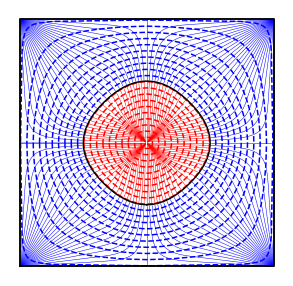

In [222]:
plt.figure(figsize=[5,5])
num_points = float(100)
for vof in np.arange(0.005,1,0.05):
    x = []
    y = []
    for angle in np.arange(0,2*np.pi*(1+1/num_points),2*np.pi/num_points):
        angles = [angle,np.pi/2]
        norm = angle2norm(angles)
        x.append(flood(norm,vof)[0])
        y.append(flood(norm,vof)[1])
    if vof>0.5:
        plt.plot(x,y,'r--')
    else:
        plt.plot(x,y,'b--')
num_points = float(100)
for angle in np.arange(0,2*np.pi*(1+1/num_points),2*np.pi/num_points):
    x = []
    y = []
    for vof in np.arange(1e-10,0.5,0.01):
        angles = [angle,np.pi/2]
        norm = angle2norm(angles)
        x.append(flood(norm,vof)[0])
        y.append(flood(norm,vof)[1])
    plt.plot(x,y,'b',linewidth=0.5)
    x = []
    y = []
    for vof in np.arange(0.5,1,0.01):
        angles = [angle,np.pi/2]
        norm = angle2norm(angles)
        x.append(flood(norm,vof)[0])
        y.append(flood(norm,vof)[1])
    plt.plot(x,y,'r',linewidth=0.5)
    
x = []
y = []
vof=0.5
for angle in np.arange(0,2*np.pi*(1+1/num_points),2*np.pi/num_points):
    angles = np.array([0.0,angle])
    norm = angle2norm(angles)
    x.append(flood(norm,vof)[0])
    y.append(flood(norm,vof)[2])
    
plt.plot(x,y,'k')
plt.axis('off')
plt.plot([0,1,1,0,0],[0,0,1,1,0],'k')
plt.plot([0,1,1,0,0],[0,0,1,1,0],'k')
plt.savefig('flood.pdf')

# Sketch of angles

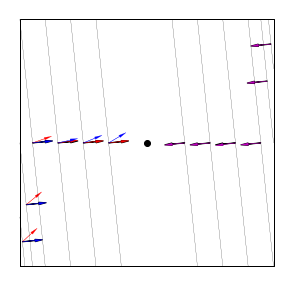

In [225]:
plt.figure(figsize=[5,5])
## old
cx = 0.01/3
cy = 0.1/3
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = n1 / n12,n2 / n12 
nx,ny = nx / nxy,ny / nxy 
nx2,ny2 = nx2 / nxy2,ny2 / nxy2
plt.plot([0,0.02],[0.2,0],'k',linewidth=0.2)
plt.arrow(0.01, 0.1,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.01, 0.1,nx, ny, head_width=0.01, head_length=0.03, fc='r', ec='r',linewidth=0.2)
plt.arrow(0.01, 0.1,nx2, ny2, head_width=0.01, head_length=0.03, fc='b', ec='b',linewidth=0.2)

cx = 0.025/3
cy = 0.25/3
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = n1 / n12,n2 / n12 
nx,ny = nx / nxy,ny / nxy 
nx2,ny2 = nx2 / nxy2,ny2 / nxy2
plt.plot([0,0.05],[0.5,0],'k',linewidth=0.2)
plt.arrow(0.025, 0.25,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.025, 0.25,nx, ny, head_width=0.01, head_length=0.03, fc='r', ec='r',linewidth=0.2)
plt.arrow(0.025, 0.25,nx2, ny2, head_width=0.01, head_length=0.03, fc='b', ec='b',linewidth=0.2)

cx = 0.1/3
cy = 1/3
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = n1 / n12,n2 / n12 
nx,ny = nx / nxy,ny / nxy 
nx2,ny2 = nx2 / nxy2,ny2 / nxy2
plt.plot([0,0.1],[1.0,0],'k',linewidth=0.2)
plt.arrow(0.05, 0.5,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.05, 0.5,nx, ny, head_width=0.01, head_length=0.03, fc='r', ec='r',linewidth=0.2)
plt.arrow(0.05, 0.5,nx2, ny2, head_width=0.01, head_length=0.03, fc='b', ec='b',linewidth=0.2)
       
cx = (0.1/3 * 0.05 + (0.1/3+0.1) * 0.1) / 0.15
cy = (1/3 * 0.05 + 1/2* 0.1) / 0.15
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = n1 / n12,n2 / n12 
nx,ny = nx / nxy,ny / nxy 
nx2,ny2 = nx2 / nxy2,ny2 / nxy2
plt.plot([0.1,0.2],[1.0,0.0],'k',linewidth=0.2)
plt.arrow(0.15, 0.5,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.15, 0.5,nx, ny, head_width=0.01, head_length=0.03, fc='r', ec='r',linewidth=0.2)
plt.arrow(0.15, 0.5,nx2, ny2, head_width=0.01, head_length=0.03, fc='b', ec='b',linewidth=0.2)

cx = (0.1/3 * 0.05 + (0.1/3+0.2) * 0.2) / 0.25
cy = (1/3 * 0.05 + 1/2* 0.2) / 0.25
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = n1 / n12,n2 / n12 
nx,ny = nx / nxy,ny / nxy 
nx2,ny2 = nx2 / nxy2,ny2 / nxy2
plt.plot([0.2,0.3],[1.0,0.0],'k',linewidth=0.2)
plt.arrow(0.25, 0.5,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.25, 0.5,nx, ny, head_width=0.01, head_length=0.03, fc='r', ec='r',linewidth=0.2)
plt.arrow(0.25, 0.5,nx2, ny2, head_width=0.01, head_length=0.03, fc='b', ec='b',linewidth=0.2)

cx = (0.1/3 * 0.05 + (0.1/3+0.3) * 0.3) / 0.35
cy = (1/3 * 0.05 + 1/2* 0.3) / 0.35
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = n1 / n12,n2 / n12 
nx,ny = nx / nxy,ny / nxy 
nx2,ny2 = nx2 / nxy2,ny2 / nxy2
plt.plot([0.3,0.4],[1.0,0.0],'k',linewidth=0.2)
plt.arrow(0.35, 0.5,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.35, 0.5,nx, ny, head_width=0.01, head_length=0.03, fc='r', ec='r',linewidth=0.2)
plt.arrow(0.35, 0.5,nx2, ny2, head_width=0.01, head_length=0.03, fc='b', ec='b',linewidth=0.2)

# cx = (0.1/3 * 0.05 + (0.1/3+0.4) * 0.4) / 0.45
# cy = (1/3 * 0.05 + 1/2* 0.4) / 0.45
# n1,n2 = 0.1, 0.01
# nx,ny = 0.5-cx,0.5-cy
# nx2,ny2 = 1/cx,1/cy
# n12 = np.sqrt(n1**2+n2**2) * 20
# nxy = np.sqrt(nx**2+ny**2) * 20
# nxy2 = np.sqrt(nx2**2+ny2**2) * 20
# n1,n2 = n1 / n12,n2 / n12 
# nx,ny = nx / nxy,ny / nxy 
# nx2,ny2 = nx2 / nxy2,ny2 / nxy2
# plt.plot([0.4,0.5],[1.0,0.0],'k',linewidth=0.2)
# plt.arrow(0.45, 0.5,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
# plt.arrow(0.45, 0.5,nx, ny, head_width=0.01, head_length=0.03, fc='r', ec='r',linewidth=0.2)
# plt.arrow(0.45, 0.5,nx2, ny2, head_width=0.01, head_length=0.03, fc='b', ec='b',linewidth=0.2)

## new
cx = 0.01/3
cy = 0.1/3
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = - n1 / n12,- n2 / n12 
nx,ny = - nx / nxy,- ny / nxy 
nx2,ny2 = - nx2 / nxy2,- ny2 / nxy2
plt.plot([1,0.98],[0.8,1],'k',linewidth=0.2)
plt.arrow(0.99, 0.9,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.99, 0.9,nx2, ny2, head_width=0.01, head_length=0.03, fc='m', ec='m',linewidth=0.2)

cx = 0.025/3
cy = 0.25/3
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = -n1 / n12,-n2 / n12 
nx,ny = -nx / nxy,-ny / nxy 
nx2,ny2 = -nx2 / nxy2,-ny2 / nxy2
plt.plot([1.0,0.95],[0.5,1.0],'k',linewidth=0.2)
plt.arrow(0.975, 0.75,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.975, 0.75,nx2, ny2, head_width=0.01, head_length=0.03, fc='m', ec='m',linewidth=0.2)

cx = 0.1/3
cy = 1/3
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = -n1 / n12,-n2 / n12 
nx,ny = -nx / nxy,-ny / nxy 
nx2,ny2 = -nx2 / nxy2,-ny2 / nxy2
plt.plot([1.0,0.9],[0,1.0],'k',linewidth=0.2)
plt.arrow(0.95, 0.5,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.95, 0.5,nx2, ny2, head_width=0.01, head_length=0.03, fc='m', ec='m',linewidth=0.2)
       
cx = (0.1/3 * 0.05 + (0.1/3+0.1) * 0.1) / 0.15
cy = (1/3 * 0.05 + 1/2* 0.1) / 0.15
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = -n1 / n12,-n2 / n12 
nx,ny = -nx / nxy,-ny / nxy 
nx2,ny2 = -nx2 / nxy2,-ny2 / nxy2
plt.plot([0.9,0.8],[0.0,1.0],'k',linewidth=0.2)
plt.arrow(0.85, 0.5,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.85, 0.5,nx, ny, head_width=0.01, head_length=0.03, fc='m', ec='m',linewidth=0.2)

cx = (0.1/3 * 0.05 + (0.1/3+0.2) * 0.2) / 0.25
cy = (1/3 * 0.05 + 1/2* 0.2) / 0.25
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = -n1 / n12,-n2 / n12 
nx,ny = -nx / nxy,-ny / nxy 
nx2,ny2 = -nx2 / nxy2,-ny2 / nxy2
plt.plot([0.8,0.7],[0.0,1.0],'k',linewidth=0.2)
plt.arrow(0.75, 0.5,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.75, 0.5,nx, ny, head_width=0.01, head_length=0.03, fc='m', ec='m',linewidth=0.2)

cx = (0.1/3 * 0.05 + (0.1/3+0.3) * 0.3) / 0.35
cy = (1/3 * 0.05 + 1/2* 0.3) / 0.35
n1,n2 = 0.1, 0.01
nx,ny = 0.5-cx,0.5-cy
nx2,ny2 = 1/cx,1/cy
n12 = np.sqrt(n1**2+n2**2) * 20
nxy = np.sqrt(nx**2+ny**2) * 20
nxy2 = np.sqrt(nx2**2+ny2**2) * 20
n1,n2 = -n1 / n12,-n2 / n12 
nx,ny = -nx / nxy,-ny / nxy 
nx2,ny2 = -nx2 / nxy2,-ny2 / nxy2
plt.plot([0.7,0.6],[0.0,1.0],'k',linewidth=0.2)
plt.arrow(0.65, 0.5,n1, n2, head_width=0.01, head_length=0.03, fc='k', ec='k',linewidth=1.0)
plt.arrow(0.65, 0.5,nx, ny, head_width=0.01, head_length=0.03, fc='m', ec='m',linewidth=0.2)

plt.scatter([0.5],[0.5],color='k')

plt.axis('off')
plt.plot([0,1,1,0,0],[0,0,1,1,0],'k',linewidth=1.0)

plt.savefig('initial.pdf')

0.24586780085148818

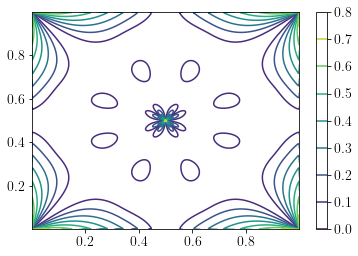

In [264]:
x1 = np.logspace(-8, np.exp(1/2), 500, endpoint=True)
vofs = x1[x1<=0.5]
vofs = np.concatenate([vofs,1.0-vofs])
vofs=np.sort(vofs)
# plt.figure(figsize=[5,5])
num_points = float(500)
x = []
y = []
z = []
for angle in np.arange(-np.pi,np.pi*(1+1/num_points),2*np.pi/num_points):
    for vof in vofs:
        angles = [angle,np.pi/2]
        norm = angle2norm(angles)
        cx = flood(norm,vof)[0]
        cy = flood(norm,vof)[1]
        nx = 0.5 - cx
        ny = 0.5 - cy
        norm3 = np.array([nx,ny,0])
        angle2 = norm2angle(np.array(norm3))
        init_angle = angle2[0] 
        x.append(cx)
        y.append(cy)
        diff_ang = np.abs(angle-init_angle)
        if (diff_ang>np.pi):
            diff_ang = diff_ang - 2.0*np.pi
        if (diff_ang<0):
            diff_ang = - diff_ang
        z.append(diff_ang)
        
x = np.array(x)
y = np.array(y)
z = np.array(z)

# x.shape
# x1 = np.arange(0, 1, 0.01)
# y1 = np.arange(0, 1, 0.01)
# f = interpolate.interp2d(x, y, z, kind='cubic')
# xx, yy = np.meshgrid(x1, y1)
# zz = f(x1,y1)

plt.tricontour(x,y,z)
plt.colorbar()
plt.savefig('initial_error.pdf')
z.max()/np.pi

0.0471365829995384

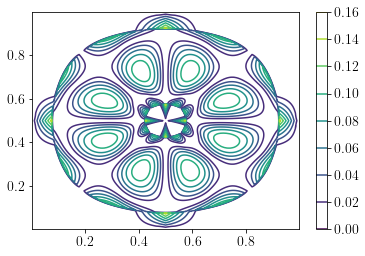

In [263]:
x1 = np.logspace(-8, np.exp(1/2), 500, endpoint=True)
vofs = x1[x1<=0.5]
vofs = np.concatenate([vofs,1.0-vofs])
vofs=np.sort(vofs)
# plt.figure(figsize=[5,5])
num_points = float(500)
x = []
y = []
z = []
for angle in np.arange(-np.pi,np.pi*(1+1/num_points),2*np.pi/num_points):
    for vof in vofs:
        angles = [angle,np.pi/2]
        norm = angle2norm(angles)
        cx = flood(norm,vof)[0]
        cy = flood(norm,vof)[1]
        x.append(cx)
        y.append(cy)
        if (vof>0.5):
            cx = (0.5 - cx * vof) / (1.0-vof)
            cy = (0.5 - cy * vof) / (1.0-vof)
            ff = -1.0
        if (cx>0.5):
            ccx = 1.0-cx
            px = -1.0
        else:
            ccx = cx
            px = 1.0  
        if (cy>0.5):
            ccy = 1.0-cy
            py = -1.0
        else:
            ccy = cy
            py = 1.0 
        if (vof<0.15 or vof>0.85):
            nx = 1.0 / (ccx +1e-20) * px
            ny = 1.0 / (ccy +1e-20) * py
        else:
            nx = 0.5 - cx
            ny = 0.5 - cy
        if vof>0.5:
            nx = -nx
            ny = -ny
        norm3 = np.array([nx,ny,0])
        angle2 = norm2angle(np.array(norm3))
        init_angle = angle2[0] 
        
        diff_ang = np.abs(angle-init_angle)
        if (diff_ang>np.pi):
            diff_ang = diff_ang - 2.0*np.pi
        if (diff_ang<0):
            diff_ang = - diff_ang
        z.append(diff_ang)
        
x = np.array(x)
y = np.array(y)
z = np.array(z)
plt.tricontour(x,y,z)
plt.colorbar()
plt.savefig('initial_error_hybrid.pdf')
z.max()/np.pi

0.14664863654238

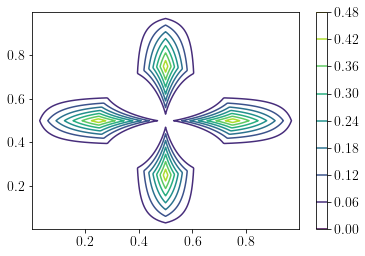

In [265]:
x1 = np.logspace(-8, np.exp(1/2), 500, endpoint=True)
vofs = x1[x1<=0.5]
vofs = np.concatenate([vofs,1.0-vofs])
vofs=np.sort(vofs)
# plt.figure(figsize=[5,5])
num_points = float(500)
x = []
y = []
z = []
for angle in np.arange(-np.pi,np.pi*(1+1/num_points),2*np.pi/num_points):
    for vof in vofs:
        angles = [angle,np.pi/2]
        norm = angle2norm(angles)
        cx = flood(norm,vof)[0]
        cy = flood(norm,vof)[1]
        x.append(cx)
        y.append(cy)
        if (vof>0.5):
            cx = (0.5 - cx * vof) / (1.0-vof)
            cy = (0.5 - cy * vof) / (1.0-vof)
            ff = -1.0
        if (cx>0.5):
            ccx = 1.0-cx
            px = -1.0
        else:
            ccx = cx
            px = 1.0  
        if (cy>0.5):
            ccy = 1.0-cy
            py = -1.0
        else:
            ccy = cy
            py = 1.0 
        if (vof<0.55 or vof>0.45):
            nx = 1.0 / (ccx +1e-20) * px
            ny = 1.0 / (ccy +1e-20) * py
        else:
            nx = 0.5 - cx
            ny = 0.5 - cy
        if vof>0.5:
            nx = -nx
            ny = -ny
        norm3 = np.array([nx,ny,0])
        angle2 = norm2angle(np.array(norm3))
        init_angle = angle2[0] 
        
        diff_ang = np.abs(angle-init_angle)
        if (diff_ang>np.pi):
            diff_ang = diff_ang - 2.0*np.pi
        if (diff_ang<0):
            diff_ang = - diff_ang
        z.append(diff_ang)
        
x = np.array(x)
y = np.array(y)
z = np.array(z)
plt.tricontour(x,y,z)
plt.colorbar()
plt.savefig('initial_error2.pdf')
z.max()/np.pi

In [6]:
norm = np.array([-1,0,0])
norm = np.array([0,-1,0])
# norm = np.array([1,0,0])
# norm = np.array([0,0,-1])
norm2angle(norm)

array([-1.57079637,  1.57079633])

In [ ]:
plt.figure(figsize=[5,5])
num_points = float(100)
for vof in np.arange(0.005,1,0.05):
    x = []
    y = []
    for angle in np.arange(0,2*np.pi*(1+1/num_points),2*np.pi/num_points):
        angles = np.array([0.0,angle])
        norm = angle2norm(angles)
        x.append(flood(norm,vof)[0])
        y.append(flood(norm,vof)[2])
    if vof>0.5:
        plt.plot(x,y,'r--')
    else:
        plt.plot(x,y,'b--')
num_points = float(100)
for angle in np.arange(0,2*np.pi*(1+1/num_points),2*np.pi/num_points):
    x = []
    y = []
    for vof in np.arange(1e-10,0.5,0.01):
        angles = np.array([0.0,angle])
        norm = angle2norm(angles)
        x.append(flood(norm,vof)[0])
        y.append(flood(norm,vof)[2])
    plt.plot(x,y,'b',linewidth=0.5)
    x = []
    y = []
    for vof in np.arange(0.5,1,0.01):
        angles = np.array([0.0,angle])
        norm = angle2norm(angles)
        x.append(flood(norm,vof)[0])
        y.append(flood(norm,vof)[2])
    plt.plot(x,y,'r',linewidth=0.5)
    
x = []
y = []
vof=0.5
for angle in np.arange(0,2*np.pi*(1+1/num_points),2*np.pi/num_points):
    angles = np.array([0.0,angle])
    norm = angle2norm(angles)
    x.append(flood(norm,vof)[0])
    y.append(flood(norm,vof)[2])
    
plt.plot(x,y,'k')
plt.axis('off')
plt.plot([0,1,1,0,0],[0,0,1,1,0],'k')
plt.savefig('flood.pdf')

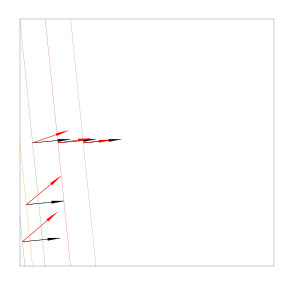

In [11]:
np.arange(0,2*np.pi,2*np.pi/20)

array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
       1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
       3.14159265, 3.45575192, 3.76991118, 4.08407045, 4.39822972,
       4.71238898, 5.02654825, 5.34070751, 5.65486678, 5.96902604])

In [7]:
print(flood.__doc__)
print(norm2angle.__doc__)

xc0 = floodsz_backwardc(nr,cc)

Wrapper for ``floodsz_backwardc``.

Parameters
----------
nr : input rank-1 array('d') with bounds (3)
cc : input float

Returns
-------
xc0 : rank-1 array('d') with bounds (3)

angle = norm2angle(norm)

Wrapper for ``norm2angle``.

Parameters
----------
norm : input rank-1 array('d') with bounds (3)

Returns
-------
angle : rank-1 array('d') with bounds (2)



In [39]:
nmax = np.where(E_BFGS2==E_BFGS2.max())
nmax
print(exact[nmax[0]])
print(BFGS2[nmax[0]])
print(E_BFGS2[nmax[0]])
print(f[nmax[0]])

[[-9.95162654e-01  7.88228338e-04 -4.04911731e-03]]
[[0. 0. 0.]]
[[9.95162654e-01 7.88228338e-04 4.04911731e-03]]
[0.05775482]


In [40]:
nmax = np.where(E_GN==E_GN.max())
nmax
print(exact[nmax[0]])
print(GN[nmax[0]])
print(E_GN[nmax[0]])
print(f[nmax[0]])

[[-0.51065129  0.48320496  0.00614374]]
[[-0.9271549  -0.04511565  0.02772946]]
[[0.41650361 0.52832061 0.02158571]]
[6.55784165e-05]


In [41]:
nmax = np.where(E_ZY==E_ZY.max())
nmax
print(exact[nmax[0]])
print(ZY[nmax[0]])
print(E_ZY[nmax[0]])
print(f[nmax[0]])

[[-0.63254531 -0.0225475   0.34490719]]
[[-0.01382023 -0.01137245  0.97480732]]
[[0.61872508 0.01117505 0.62990013]]
[0.99990745]
